In [5]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# 过程介绍
首先我们需要采样自真实模型的多组数据，对于已知真实模型的玩具样例(Toy Example)， 我们直接从指定的𝑤 = 1.477, 𝑏 = 0.089的真实模型中直接采样


In [41]:
def generate_data(w,b):
    '''
    generate data -> (100,2), ndarray
    '''
    data = []
    # 100 data
    for i in range(100):
        x = np.random.uniform(-10, 10) # 均值随机数
        eps = np.random.normal(0, 1) # guassian noise 均值0 方差0.01
        y = w*x + b + eps           # pretend to be the data with some noises
        data.append([x,y])
    data = np.array(data)
    return data

def plotData(data):
    '''
    :param data: (X,Y) = (100,2), ndarray
    :return: None
    '''
    X = data[:,0]
    Y = data[:,1]
    plt.scatter(X,Y,edgecolors='red')
    plt.show()

# 生成并显示数据

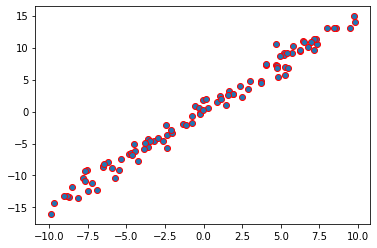

In [16]:
w = 1.477
b = 0.089
data = generate_data(w,b)
plotData(data)

In [19]:
def predict(w,b,X):
    '''
    predict linear regression value Y = w*X + b
    X -> (m,1)
    '''
    Y_hat = w*X + b
    return Y_hat

In [31]:
def computeCost(Y,Y_hat):
    '''
    Use MSE/l2 loss to measure error value
    Y -> 真实label(100,1)
    Y_hat -> 模型根据X得到的预测值Y_hat
    '''
    m = Y.shape[0]
    cost = 1/m * np.sum(np.square(Y_hat-Y))
    return cost

In [32]:
X = data[:,0]
Y = data[:,1]
Y_hat = predict(w,b,X)
initialcost = computeCost(Y,Y_hat)

In [34]:
print(initialcost)

1.0966315658824168


# 梯度下降
w的梯度
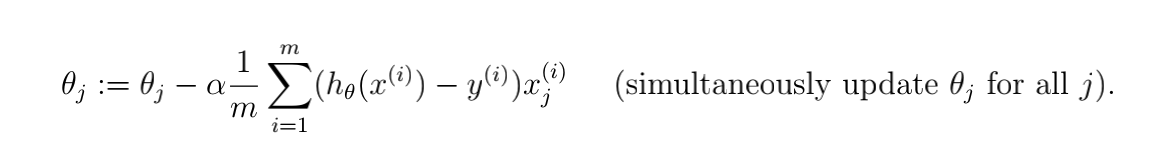

In [45]:
def step_gradient(w_current, b_current, X, Y, alpha=0.01):     
    '''
    w_current -> 目前的w
    b_current -> 目前的b
    X -> data Input (100,)
    Y -> label (100,)
    alpha -> 学习速率
    '''
    # initialize gradint     
    w_gradient = 0    
    b_gradient = 0        
    m = Y.shape[0]
    Y_hat = predict(w_current,b_current,X)  # m,1
    
    # compute gradient
    grab_w = alpha/m * np.sum(np.dot(Y_hat-Y,X))
    grab_b = alpha/m * np.sum(Y_hat-Y)

    # update w,b
    new_w = w_current - grab_w
    new_b = b_current - grab_b

    return [new_b, new_w]

In [63]:
def gradient_descent(w,b,X,Y,alpha=0.001,iter=500):
    '''
    负责运行梯度下降，迭代多次
    w -> 目前的w
    b -> 目前的b
    X -> data Input (100,)
    Y -> label (100,)
    alpha -> 学习速率
    '''
    w_current = w
    b_current = b
    currentCost = computeCost(Y,predict(w_current,b_current,X))
    for i in range(iter):
        w_current,b_current = step_gradient(w_current,b_current,X,Y,alpha)
        if i%10 == 0:
            print("iter: {}\n now the loss is {}".format(i,computeCost(Y,predict(w_current,b_current,X))))
        
    return [w_current,b_current]

In [67]:
w = np.random.uniform(-10, 10)
b = np.random.uniform(-10, 10)
w,b = gradient_descent(w,b,X,Y)

iter: 0
 now the loss is 1510.6254005990913
iter: 10
 now the loss is 1112.348156987041
iter: 20
 now the loss is 819.6901898393266
iter: 30
 now the loss is 604.5800125686698
iter: 40
 now the loss is 446.4159570099039
iter: 50
 now the loss is 330.07716362162387
iter: 60
 now the loss is 244.4643767651822
iter: 70
 now the loss is 181.4293961642604
iter: 80
 now the loss is 134.9896439066665
iter: 90
 now the loss is 100.75189356504599
iter: 100
 now the loss is 75.48944445787807
iter: 110
 now the loss is 56.83186846940254
iter: 120
 now the loss is 43.03734597890136
iter: 130
 now the loss is 32.82559524006711
iter: 140
 now the loss is 25.255259087164497
iter: 150
 now the loss is 19.633911211641315
iter: 160
 now the loss is 15.451997427737505
iter: 170
 now the loss is 12.334340462942349
iter: 180
 now the loss is 10.004533696908345
iter: 190
 now the loss is 8.258794117823374
iter: 200
 now the loss is 6.946758006865217
iter: 210
 now the loss is 5.957372846685469
iter: 220
 no

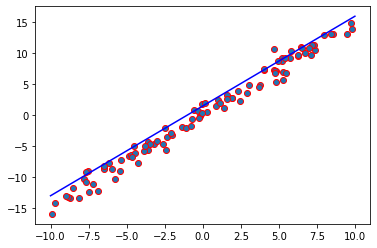

In [68]:
plt.scatter(X,Y,edgecolors='red')
x = np.linspace(-10,10,1000)
y = w*x+b
plt.plot(x,y,color="blue")
plt.show()

In [69]:
print(w,b)

1.451897829089051 1.4479363357908288
